In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

from plotly import tools
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import zscore
from scipy.stats import pointbiserialr

from sklearn.preprocessing import LabelEncoder
pd.set_option("display.max_columns",1000)

#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../Vehicle-Loan-Default-Prediction/Dataset/train.csv')

In [3]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
df["loan_default"].value_counts(normalize=True)

loan_default
0    0.782929
1    0.217071
Name: proportion, dtype: float64

In [5]:
df.shape

(233154, 41)

**Disbursed Amount**

In [6]:
df["disbursed_amount"].describe()

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: disbursed_amount, dtype: float64

<Axes: xlabel='disbursed_amount', ylabel='Density'>

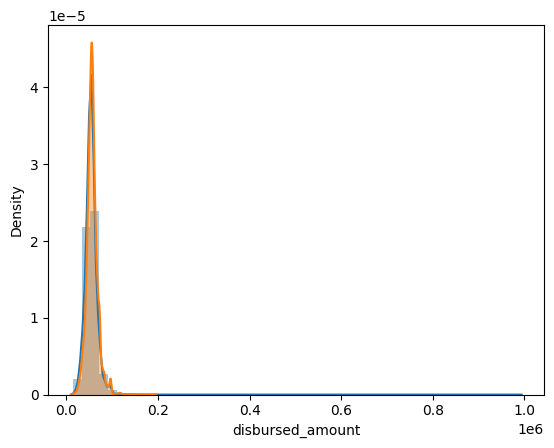

In [7]:
sns.distplot(df[df["loan_default"]==0]["disbursed_amount"])
sns.distplot(df[df["loan_default"]==1]["disbursed_amount"])

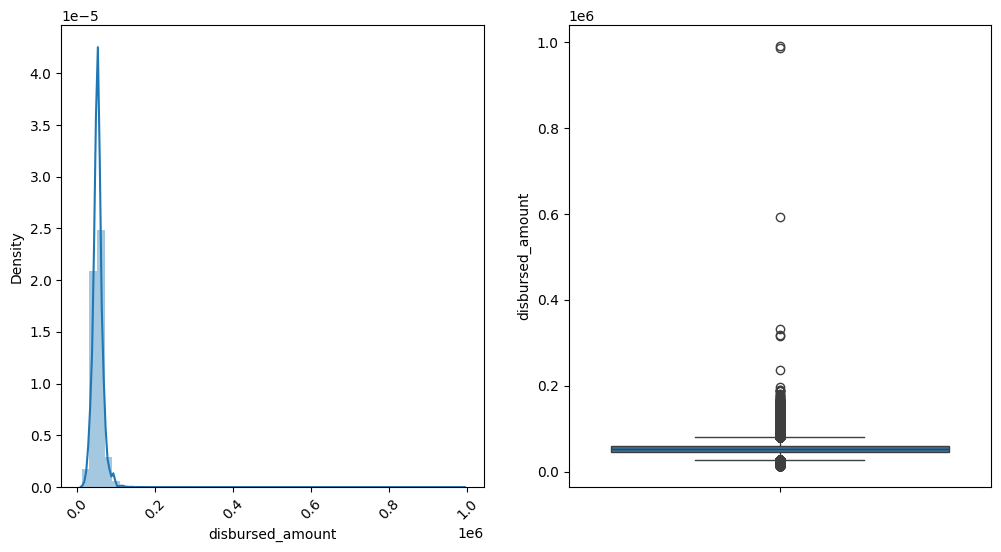

In [8]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.distplot(df["disbursed_amount"],ax=ax[0])
sns.boxplot(df["disbursed_amount"],ax=ax[1])
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)
plt.show()

<Axes: xlabel='loan_default', ylabel='disbursed_amount'>

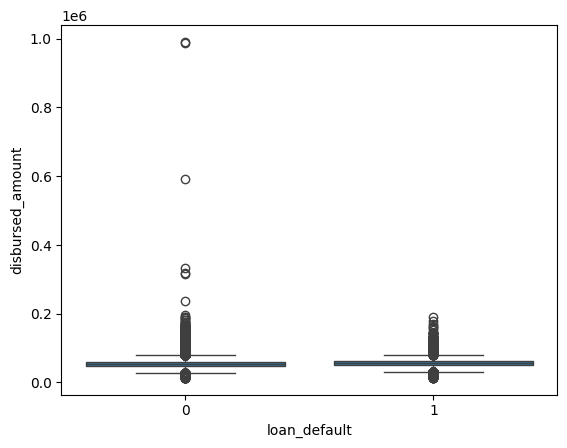

In [9]:
sns.boxplot(x=df["loan_default"],y=df["disbursed_amount"])

In [10]:
print(df["disbursed_amount"].skew())

4.4922396638902455


In [11]:
print(df["disbursed_amount"].kurt())

249.9892735051841


Most of the data are close towards the center as mean and median are almost identical.

In [12]:
f_oneway(df["loan_default"],df["disbursed_amount"])

F_onewayResult(statistic=4094324.885317873, pvalue=0.0)

p-value less than .05 it failed to reject the null hypothesis which shows it is significant variable in spitting target variable.

**Loan to value ratio**

In [13]:
loan_0=df[df["loan_default"]==0]
loan_1=df[df["loan_default"]==1]

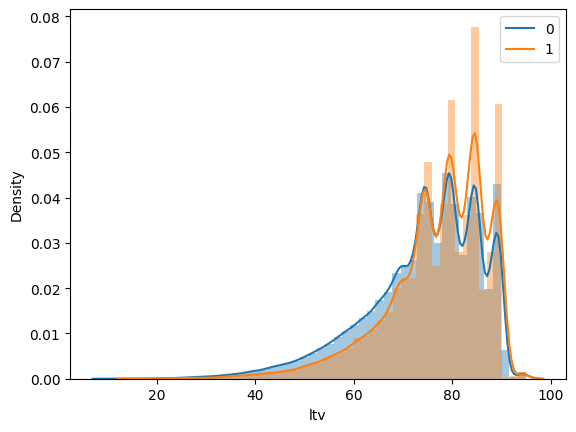

In [14]:
sns.distplot(loan_0["ltv"])
sns.distplot(loan_1["ltv"])
plt.legend([0,1])
plt.show()

<Axes: xlabel='loan_default', ylabel='ltv'>

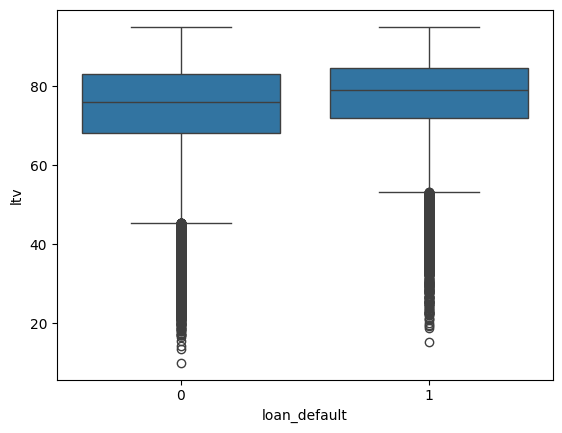

In [15]:
sns.boxplot(x=df["loan_default"],y=df["ltv"])

Higher the ltv,There are chances of getting defaulted.

- H0:Mean_of_0 == Mean_of_1 
- H1:Mean_of_0!= Mean_of_1

In [16]:
ttest_ind(loan_0["ltv"],loan_1["ltv"])

TtestResult(statistic=-47.65077542766104, pvalue=0.0, df=233152.0)

 p-value less than .05 it failed to reject the null hypothesis which shows it is significant variable in spitting target variable.

**asset_cost**

This is the orginal price of the vehicle from which depreceated value can be calculated over the course of its useful life 

In [17]:
df["asset_cost"].describe()

count    2.331540e+05
mean     7.586507e+04
std      1.894478e+04
min      3.700000e+04
25%      6.571700e+04
50%      7.094600e+04
75%      7.920175e+04
max      1.628992e+06
Name: asset_cost, dtype: float64

In [18]:
print(df["asset_cost"].skew())

6.133485335511084


In [19]:
print(df["asset_cost"].kurt())

291.49393926915474


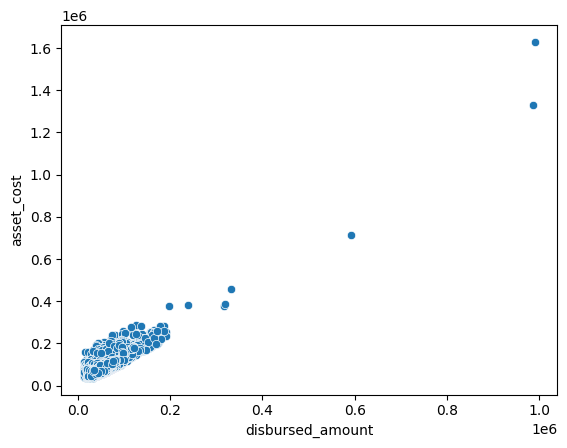

In [20]:
sns.scatterplot(x=df["disbursed_amount"], y=df["asset_cost"])
plt.show()

In [21]:
df[["disbursed_amount","asset_cost"]].corr()

,disbursed_amount,asset_cost
disbursed_amount,1.000000,0.752668
asset_cost,0.752668,1.000000


Disbursed amount and asset cost seems to be positively correlated which is seen in both scatterplot as well as in correlation table.

- H0:Mean_of_0 == Mean_of_1 
- H1:Mean_of_0 != Mean_of_1

In [22]:
ttest_ind(loan_0["asset_cost"],loan_1["asset_cost"])

TtestResult(statistic=-6.886906209368185, pvalue=5.716223071536897e-12, df=233152.0)

p-value less than .05 it failed to reject the null hypothesis which shows it is significant variable in spitting target variable.

**Branch_id**

In [23]:
df["branch_id"].nunique()

82

In [24]:
#comparison with target variable:
com_df=pd.crosstab(df["branch_id"],df["loan_default"],normalize="index")

In [25]:
com_df.sort_values(1,ascending=False)

loan_default,0,1
branch_id,,
251,0.656087,0.343913
254,0.675692,0.324308
97,0.686375,0.313625
36,0.703238,0.296762
78,0.708524,0.291476
...,...,...
100,0.842900,0.157100
1,0.850587,0.149413
17,0.852586,0.147414


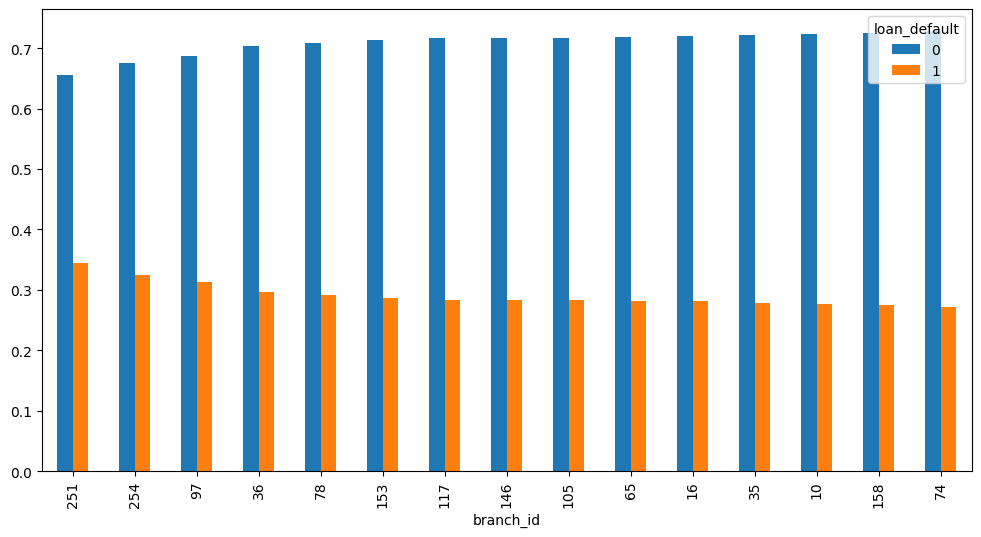

In [26]:
#plt.figure(figsize=(14,7))
com_df.sort_values(1,ascending=False)[:15].plot.bar(figsize=(12,6))
plt.show()

 These branches have highest number of defaulters`

- H0-There is no siginificant relationship between the branches and no_of_defaulters
- H1-There is  siginificant relationship between the branches and no_of_defaulters

In [27]:
conti_table=pd.crosstab(df["branch_id"],df["loan_default"])

In [28]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [29]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 2930.842784292354 p_value- 0.0


P_value less than .05 which rejects null hypotheis in favour of alternate hypothesis.There is significant relationship between the branches and no_of_defaulters.

**manufacturer_id**

In [30]:
df["manufacturer_id"].nunique()

11

In [31]:
#comparison with target variable:
com_df=pd.crosstab(df["manufacturer_id"],df["loan_default"],normalize="index")

In [32]:
com_df.sort_values(1,ascending=False)

loan_default,0,1
manufacturer_id,,
153,0.666667,0.333333
48,0.727469,0.272531
45,0.771501,0.228499
120,0.779250,0.220750
49,0.781213,0.218787
67,0.782536,0.217464
51,0.792053,0.207947
86,0.795406,0.204594
145,0.799486,0.200514


<Axes: xlabel='manufacturer_id'>

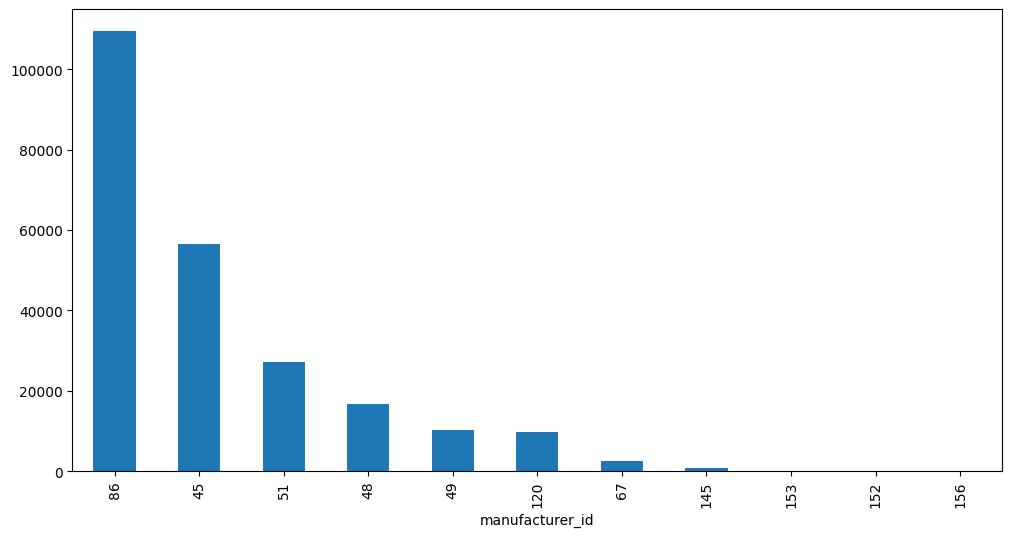

In [33]:
df["manufacturer_id"].value_counts().plot.bar(figsize=(12,6))

Top 2 players in this market seems to have huge market share with them

- H0-There is no siginificant relationship between the manufacturer and no_of_defaulters
- H1-There is  siginificant relationship between the manufacturer and no_of_defaulters

In [34]:
conti_table=pd.crosstab(df["manufacturer_id"],df["loan_default"])

In [35]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [36]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 464.69764016358414 p_value- 1.5277380091688755e-93


P_value less than .05 which rejects null hypotheis in favour of alternate hypothesis.There is significant relationship between the manufactuers and no_of_defaulters.

**Current_pincode_ID**

In [37]:
df["Current_pincode_ID"].nunique()

6698

<Axes: xlabel='Current_pincode_ID'>

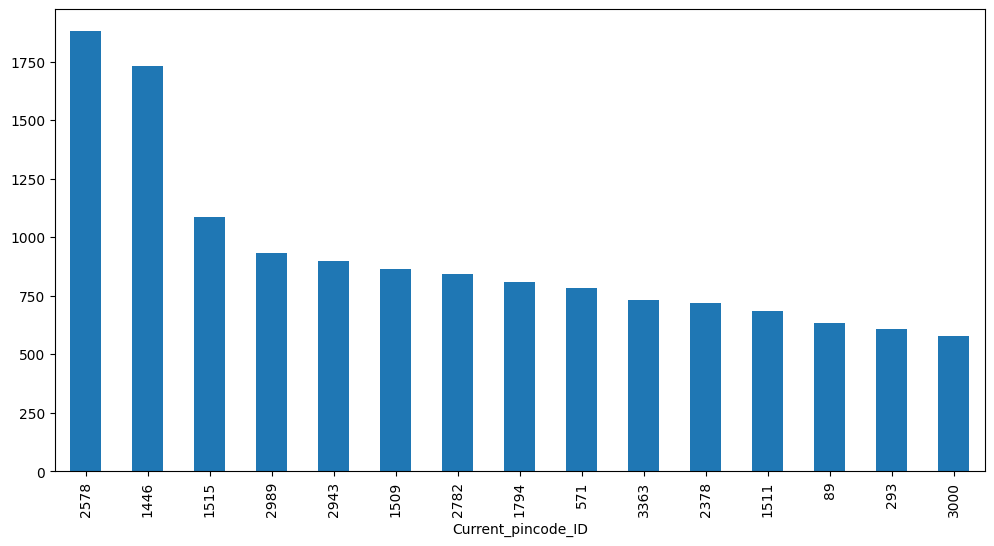

In [38]:
df["Current_pincode_ID"].value_counts()[:15].plot.bar(figsize=(12,6))

- H0-There is no siginificant relationship between the Pincodes and no_of_defaulters
- H1-There is  siginificant relationship between the Pincodes and no_of_defaulters

In [39]:
conti_table=pd.crosstab(df["Current_pincode_ID"],df["loan_default"])

In [40]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [41]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 12702.76993331368 p_value- 0.0


P_value less than .05 which rejects null hypotheis in favour of alternate hypothesis.There is significant relationship between the Current pincode and no_of_defaulters.

**Date_of_Birth and Disbursal Date**

In [42]:
df["DisbursalDate"][1]

'26-09-18'

In [43]:
def calcAge(x):
    year = int(x.split('-')[2])
    if(year<=19):
        age = 20-year
    else:
        age = 100 + (20-year)
    return age

df['Age_at_time_of_disbursement']=df['Date.of.Birth'].apply(calcAge)

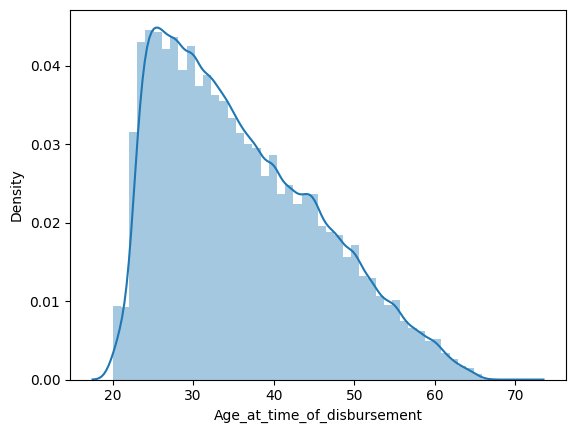

In [44]:
sns.distplot(df["Age_at_time_of_disbursement"])
plt.show()

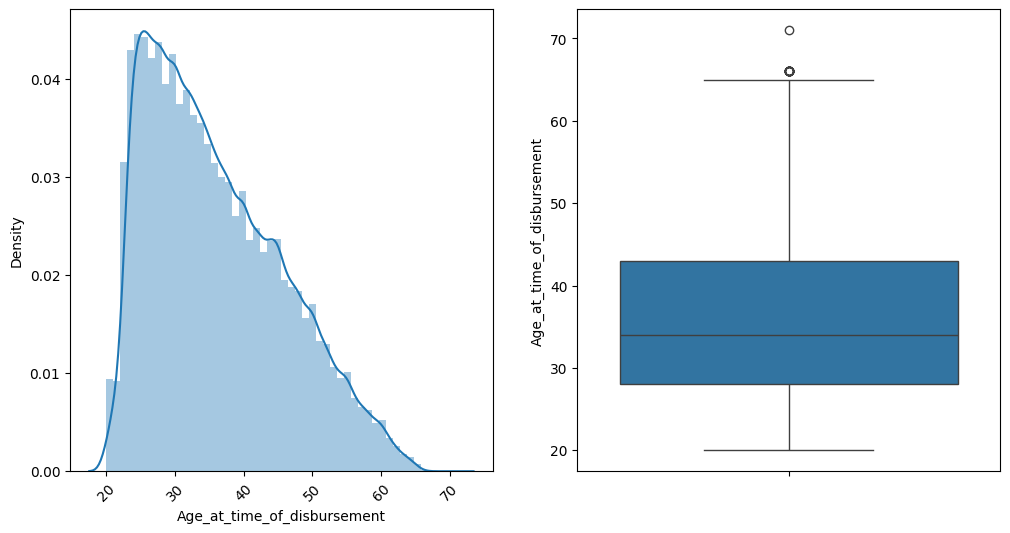

In [45]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.distplot(df["Age_at_time_of_disbursement"],ax=ax[0])
sns.boxplot(df["Age_at_time_of_disbursement"],ax=ax[1])
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)
plt.show()

<Axes: xlabel='loan_default', ylabel='Age_at_time_of_disbursement'>

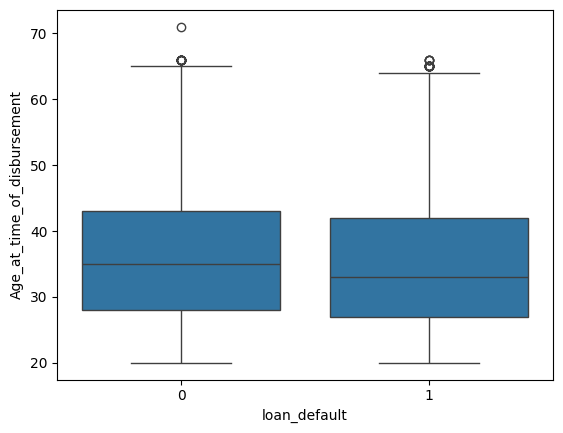

In [46]:
sns.boxplot(x=df["loan_default"],y=df["Age_at_time_of_disbursement"])

Both have same characteristic from the distplot.Let's do statistical test.

In [47]:
age_of_0=df[df["loan_default"]==0]["Age_at_time_of_disbursement"]
age_of_1=df[df["loan_default"]==1]["Age_at_time_of_disbursement"]

- H0:mean_age_of_non_defaulters == mean_age_of_non_defaulters
- H1:mean_age_of_non_defaulters != mean_age_of_non_defaulters

In [48]:
ttest_ind(age_of_0,age_of_1)

TtestResult(statistic=18.016774851215157, pvalue=1.6119724395993936e-72, df=233152.0)

pvalue less than .05 which rejects null hypothesis in favour of alternate hypothesis that mean age of both groups differ.

In [49]:
#df["year_of_disbursement"]=df["DisbursalDate"].dt.year
df["DisbursalDate"]=pd.to_datetime(df["DisbursalDate"])
df["month_of_disbursement"]=df["DisbursalDate"].dt.month

In [50]:
df["month_of_disbursement"].unique()

array([ 3,  9,  1, 10,  5,  8,  6, 11, 12,  4,  7,  2])

In [51]:
conti_table=pd.crosstab(df["month_of_disbursement"],df["loan_default"])

In [52]:
conti_table

loan_default,0,1
month_of_disbursement,,
1,1316,392
2,23,2
3,4094,1054
4,3636,991
5,2279,611
6,4697,1294
7,3222,928
8,44938,12037
9,43910,10533


In [53]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [54]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 524.4152509602986 p_value- 1.982490687174008e-105


P_value less than .05 which rejects null hypotheis in favour of alternate hypothesis.There is significant relationship between the  month and no_of_defaulters.

**Employment.Type**

In [55]:
df["Employment.Type"].value_counts()

Employment.Type
Self employed    127635
Salaried          97858
Name: count, dtype: int64

In [56]:
df.isnull().sum()[df.isnull().sum()>0]

Employment.Type    7661
dtype: int64

In [57]:
761*100/df.shape[0]

0.32639371402592277

There are 7661 null values in the column which is .32 of the total rows.So,replace them with mode

In [58]:
df["Employment.Type"]=df["Employment.Type"].fillna(df["Employment.Type"].mode()[0])

**State_id**

22


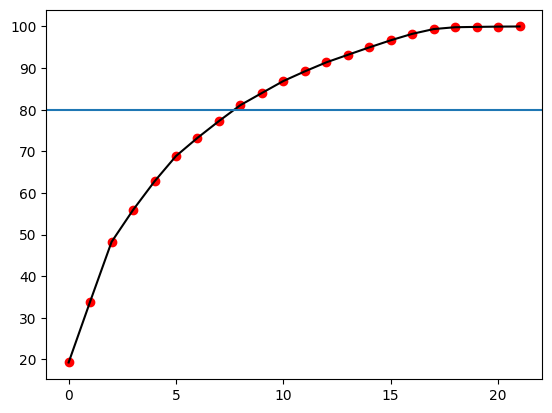

In [59]:
print(df["State_ID"].nunique())
state=df["State_ID"].value_counts()

state["percent"]=state*100/state.sum()

state["cumsum"]=state["percent"].cumsum()

plt.plot(state["cumsum"].values,"-",c="black")
plt.scatter(np.arange(0,22),state["cumsum"].values,c="r")
plt.axhline(80)

Nearly seven states contribute to 80 percent of the customers

- H0: There is no siginificant relationship between the Pincodes and no_of_defaulters
- H1: There is  siginificant relationship between the Pincodes and no_of_defaulters

In [60]:
conti_table=pd.crosstab(df["State_ID"],df["loan_default"])

In [61]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [62]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 1626.8617814468685 p_value- 0.0


 P_value less than .05 which rejects null hypotheis in favour of alternate hypothesis.There is significant relationship between the State_id and no_of_defaulters.

**PERFORM_CNS.SCORE**

In [63]:
df["PERFORM_CNS.SCORE"].describe()

count    233154.000000
mean        289.462994
std         338.374779
min           0.000000
25%           0.000000
50%           0.000000
75%         678.000000
max         890.000000
Name: PERFORM_CNS.SCORE, dtype: float64

In [64]:
group_0=df[df["loan_default"]==0]
group_1=df[df["loan_default"]==1]

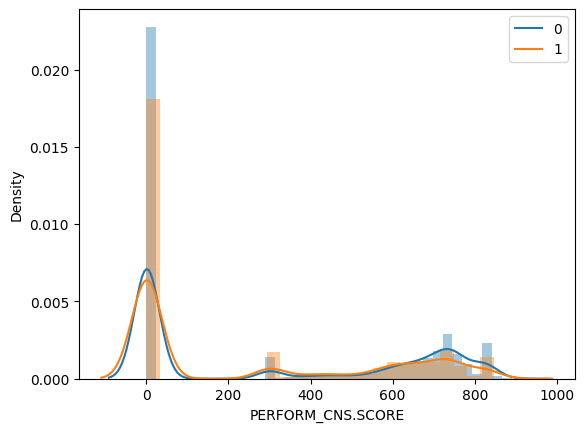

In [65]:
sns.distplot(group_0["PERFORM_CNS.SCORE"])
sns.distplot(group_1["PERFORM_CNS.SCORE"])
plt.legend([0,1])
plt.show()

In [66]:
group_0["PERFORM_CNS.SCORE"].describe()

count    182543.000000
mean        299.784270
std         342.883794
min           0.000000
25%           0.000000
50%          15.000000
75%         690.000000
max         890.000000
Name: PERFORM_CNS.SCORE, dtype: float64

In [67]:
group_1["PERFORM_CNS.SCORE"].describe()

count    50611.000000
mean       252.236372
std        318.826242
min          0.000000
25%          0.000000
50%          0.000000
75%        610.000000
max        879.000000
Name: PERFORM_CNS.SCORE, dtype: float64

Nearly 50% of the customers in the defaulter's list have cns score of zero

- H0: mean_CNS_Score_of_non_defaulters == mean_CNS_Score_of_non_defaulters
- H1: mean_CNS_Score_of_non_defaulters != mean_CNS_Score_of_non_defaulters

In [68]:
ttest_ind(group_0["PERFORM_CNS.SCORE"],group_1["PERFORM_CNS.SCORE"])

TtestResult(statistic=28.018568872971255, pvalue=1.869421119257312e-172, df=233152.0)

pvalue less than .05 which rejects null hypothesis in favour of alternate hypothesis that CNS score of both groups differ.

<Axes: xlabel='loan_default', ylabel='PERFORM_CNS.SCORE'>

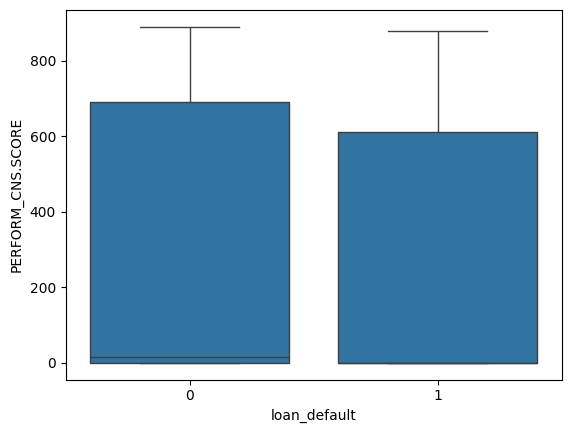

In [69]:
sns.boxplot(x=df["loan_default"],y=df["PERFORM_CNS.SCORE"])

**PERFORM_CNS.SCORE.DESCRIPTION**

In [70]:
df["PERFORM_CNS.SCORE.DESCRIPTION"].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [71]:
df.groupby("PERFORM_CNS.SCORE.DESCRIPTION").agg({"PERFORM_CNS.SCORE":["mean","min","max"]})

PERFORM_CNS.SCORE          
                                                                mean  min  max
PERFORM_CNS.SCORE.DESCRIPTION                                                 
A-Very Low Risk                                           827.662631  806  890
B-Very Low Risk                                           774.183893  761  805
C-Very Low Risk                                           741.899221  736  760
D-Very Low Risk                                           715.958091  706  735
E-Low Risk                                                691.517437  681  705
F-Low Risk                                                666.064467  651  680
G-Low Risk                                                640.853561  631  650
H-Medium Risk                                             617.031947  601  630
I-Medium Risk                                             586.832644  571  600
J-High Risk                                               549.876734  521  570
K-High Risk                                               440.594177  351  520
L-Very High Risk                                          326.601411  301  350
M-Very High Risk                                          300.000000  300  300
No Bureau History Available                                 0.000000    0    0
Not Scored: More than 50 active Accounts found             11.000000   11   11
Not Scored: No Activity seen on the customer (I...         16.000000   16   16
Not Scored: No Updates available in last 36 months         18.000000   18   18
Not Scored: Not Enough Info available on the cu...         17.000000   17   17
Not Scored: Only a Guarantor                               14.000000   14   14
Not Scored: Sufficient History Not Available               15.000000   15   15

In [72]:
val=['No Bureau History Available','Not Scored: Not Enough Info available on the customer',
    'Not Scored: No Activity seen on the customer (Inactive)','Not Scored: Sufficient History Not Available',
    'Not Scored: No Updates available in last 36 months','Not Scored: More than 50 active Accounts found','Not Scored: Only a Guarantor']

In [73]:
for i in val:
    df["PERFORM_CNS.SCORE.DESCRIPTION"]=df["PERFORM_CNS.SCORE.DESCRIPTION"].replace({i:"No_Score"})

In [74]:
pd.crosstab(df["PERFORM_CNS.SCORE.DESCRIPTION"],df["loan_default"],normalize="index").sort_values(1,ascending=False)

loan_default,0,1
PERFORM_CNS.SCORE.DESCRIPTION,,
M-Very High Risk,0.695419,0.304581
L-Very High Risk,0.719577,0.280423
K-High Risk,0.721880,0.278120
I-Medium Risk,0.727371,0.272629
J-High Risk,0.747599,0.252401
H-Medium Risk,0.758133,0.241867
No_Score,0.770274,0.229726
G-Low Risk,0.802909,0.197091
F-Low Risk,0.813789,0.186211


This column looks like a ordinal data.However,the No_score inspite of being not scored has relatively low percent of defaulters than high risk people

In [75]:
#creating a column whether they are scored are not
df["Scored_Or_Not"]=df["PERFORM_CNS.SCORE.DESCRIPTION"].apply(lambda x:1 if x=="No_Score" else 0)

- H0: There is no siginificant relationship between the CNS.desc and no_of_defaulters
- H1: There is  siginificant relationship between the CNS.desc and no_of_defaulters

In [76]:
conti_table=pd.crosstab(df["PERFORM_CNS.SCORE.DESCRIPTION"],df["loan_default"])

In [77]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [78]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 2114.4654081820345 p_value- 0.0


P_value less than .05 which rejects null hypotheis in favour of alternate hypothesis.There is significant relationship between the CNS.desc and no_of_defaulters.

#### with p_value exactly zero this seems important variable.

**PRI.NO.OF.ACCTS**

In [79]:
df["PRI.NO.OF.ACCTS"].describe()

count    233154.000000
mean          2.440636
std           5.217233
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max         453.000000
Name: PRI.NO.OF.ACCTS, dtype: float64

With over 50% of people have No loan accounts before

In [80]:
df["PRI.NO.OF.ACCTS"].value_counts().head()

PRI.NO.OF.ACCTS
0    116950
1     34978
2     19784
3     13015
4      9323
Name: count, dtype: int64

<Axes: xlabel='PRI.NO.OF.ACCTS', ylabel='Density'>

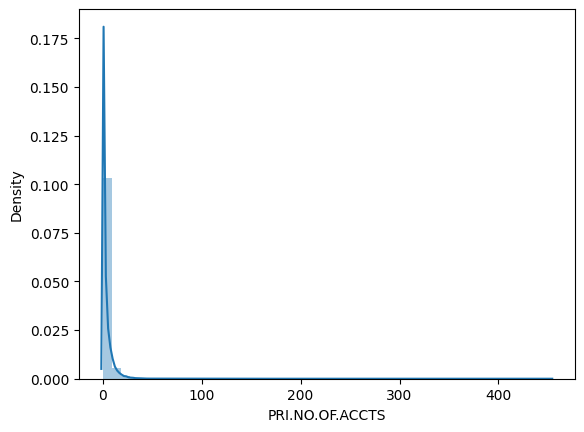

In [81]:
sns.distplot(df['PRI.NO.OF.ACCTS'])

In [82]:
df["First_Time_Account_Holder"]=df["PRI.NO.OF.ACCTS"].apply(lambda x:1 if x==0 else 0)

In [83]:
conti_table=pd.crosstab(df["First_Time_Account_Holder"],df["loan_default"],normalize="index")

- H0: There is no siginificant relationship between the First_Time_Account_Holder and no_of_defaulters
- H1: There is  siginificant relationship between the First_Time_Account_Holder and no_of_defaulters

In [84]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [85]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 0.0 p_value- 1.0


With p_value less than .05 it fails to reject null hypothesis which stats that there is no significant relationship between first time account holders and no_of_defaulters

**PRI.ACTIVE.ACCTS**

In [86]:
df["PRI.ACTIVE.ACCTS"].describe()

count    233154.000000
mean          1.039896
std           1.941496
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         144.000000
Name: PRI.ACTIVE.ACCTS, dtype: float64

Over 50% people have no active accounts 

In [87]:
df["Active_accounts_Flag"]=df["PRI.ACTIVE.ACCTS"].apply(lambda x:0 if x==0 else 1)

In [88]:
conti_table=pd.crosstab(df["Active_accounts_Flag"],df["loan_default"],normalize="index")

- H0: There is no siginificant relationship between the Active_Accounts_Flag and no_of_defaulters
- H1: There is  siginificant relationship between the Active_Accounts_Flag and no_of_defaulters

In [89]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [90]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 0.0 p_value- 1.0


This parameter also fails to reject null hypothesis which conveys there is no significant relationship between Active aaccounts flag and no_of_defaulters

**PRI.OVERDUE.ACCTS**

In [91]:
df["PRI.OVERDUE.ACCTS"].describe()

count    233154.000000
mean          0.156549
std           0.548787
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: PRI.OVERDUE.ACCTS, dtype: float64

In [92]:
df["PRI.OVERDUE.ACCTS"].value_counts()

PRI.OVERDUE.ACCTS
0     206879
1      19970
2       4302
3       1202
4        404
5        166
6         96
7         38
8         27
9         25
11        12
12         8
10         6
14         5
13         5
18         2
17         2
23         1
19         1
15         1
16         1
25         1
Name: count, dtype: int64

Only around 25000 people have overdue accounts

In [93]:
df["Overdue_accounts_Flag"]=df["PRI.OVERDUE.ACCTS"].apply(lambda x:0 if x==0 else 1)

In [94]:
conti_table=pd.crosstab(df["Overdue_accounts_Flag"],df["loan_default"],normalize="index")

- H0: There is no siginificant relationship between the Overdue_accounts_Flag and no_of_defaulters
- H1: There is  siginificant relationship between the Overdue_accounts_Flag and no_of_defaulters

In [95]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [96]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 0.0 p_value- 1.0


This parameter also fails to reject null hypothesis which conveys there is no significant relationship between Overdue aaccounts flag and no_of_defaulters

**PRI.CURRENT.BALANCE**

In [97]:
df["PRI.CURRENT.BALANCE"].describe()

count    2.331540e+05
mean     1.659001e+05
std      9.422736e+05
min     -6.678296e+06
25%      0.000000e+00
50%      0.000000e+00
75%      3.500650e+04
max      9.652492e+07
Name: PRI.CURRENT.BALANCE, dtype: float64

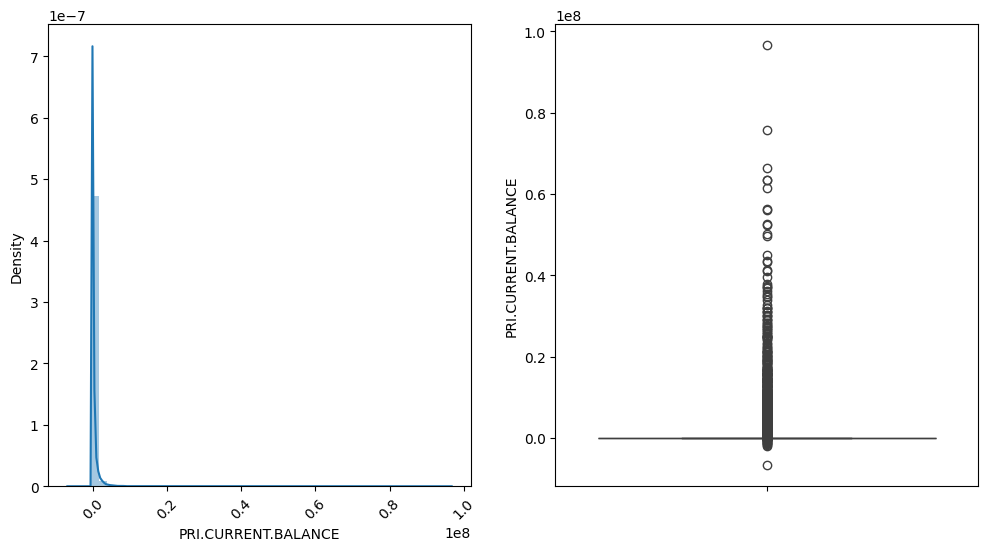

In [98]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.distplot(df["PRI.CURRENT.BALANCE"],ax=ax[0])
sns.boxplot(df["PRI.CURRENT.BALANCE"],ax=ax[1])
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)
plt.show()

<Axes: xlabel='loan_default', ylabel='PRI.CURRENT.BALANCE'>

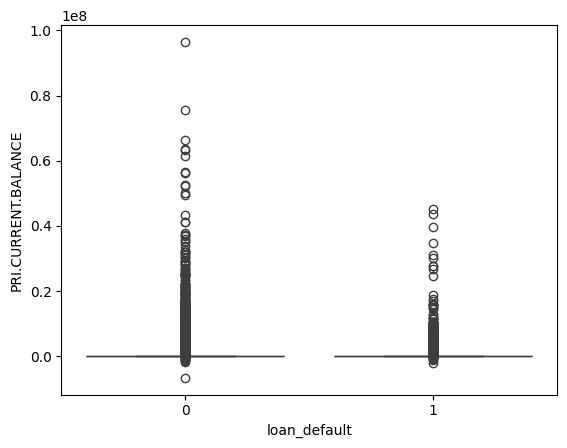

In [99]:
sns.boxplot(x=df["loan_default"],y=df["PRI.CURRENT.BALANCE"])

There are some values less than zero which doesn't seem right

**PRI.SANCTIONED.AMOUNT AND PRI.DISBURSED.AMOUNT**

In [100]:
df["PRI.SANCTIONED.AMOUNT"].describe()

count    2.331540e+05
mean     2.185039e+05
std      2.374794e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.250000e+04
max      1.000000e+09
Name: PRI.SANCTIONED.AMOUNT, dtype: float64

In [101]:
df["PRI.DISBURSED.AMOUNT"].describe()

count    2.331540e+05
mean     2.180659e+05
std      2.377744e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.080000e+04
max      1.000000e+09
Name: PRI.DISBURSED.AMOUNT, dtype: float64

both feature seems to have same characteristic

<Axes: xlabel='PRI.DISBURSED.AMOUNT', ylabel='Density'>

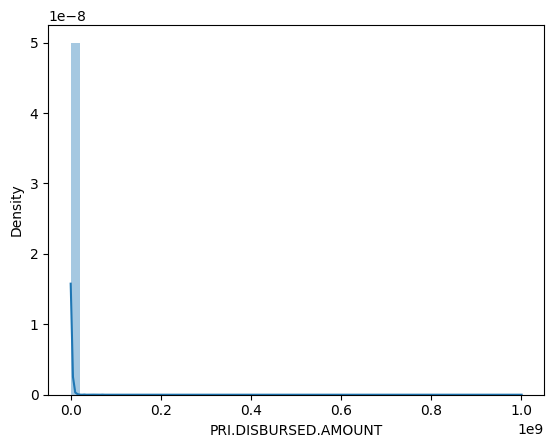

In [102]:
sns.distplot(df["PRI.DISBURSED.AMOUNT"])

<Axes: xlabel='PRI.SANCTIONED.AMOUNT', ylabel='Density'>

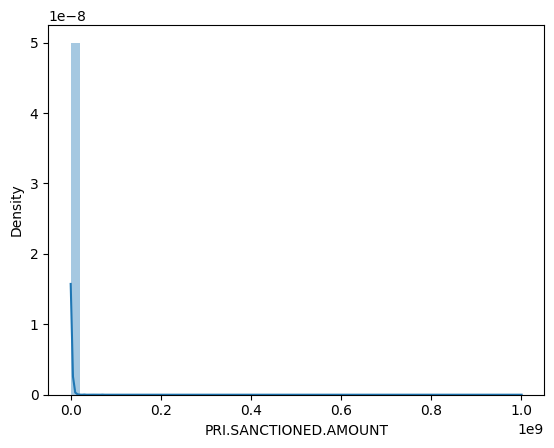

In [103]:
sns.distplot(df["PRI.SANCTIONED.AMOUNT"])

In [104]:
df[['PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT']].corr()

,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT
PRI.SANCTIONED.AMOUNT,1.000000,0.998747
PRI.DISBURSED.AMOUNT,0.998747,1.000000


In [105]:
df[df["PRI.SANCTIONED.AMOUNT"]==df["PRI.SANCTIONED.AMOUNT"].max()]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age_at_time_of_disbursement,month_of_disbursement,Scored_Or_Not,First_Time_Account_Holder,Active_accounts_Flag,Overdue_accounts_Flag
71593,598208,47773,85964,59.33,20,16700,86,6434,23-02-68,Self employed,2018-10-22,5,152,1,1,0,0,0,0,748,C-Very Low Risk,2,1,0,36041,1000000000,1000000000,0,0,0,0,0,0,0,0,0,0,2yrs 7mon,4yrs 2mon,0,1,52,10,0,0,1,0


His primary sanctioned amount is 100 crore while he had only two accounts before and his current disbursed amount seems to be less than 50000 which is two extremes.Eitherway we can't rule out.

In [106]:
ttest_ind(group_0["PRI.DISBURSED.AMOUNT"],group_1["PRI.DISBURSED.AMOUNT"])

TtestResult(statistic=5.386857453201851, pvalue=7.176942237800462e-08, df=233152.0)

In [107]:
ttest_ind(group_0["PRI.SANCTIONED.AMOUNT"],group_1["PRI.SANCTIONED.AMOUNT"])

TtestResult(statistic=5.458812718452121, pvalue=4.798158421546996e-08, df=233152.0)

Both variables have p_values less than .05 which states that mean of both groups are not equal(both are significant features)

**SEC.NO.OF.ACCTS & SEC.ACTIVE.ACCTS & SEC.OVERDUE.ACCTS**

In [108]:
df["SEC.NO.OF.ACCTS"].value_counts().head()

SEC.NO.OF.ACCTS
0    227289
1      3466
2      1036
3       444
4       292
Name: count, dtype: int64

In [109]:
conti_table=pd.crosstab(df['SEC.NO.OF.ACCTS'],df["loan_default"],normalize="index")

- H0: There is no siginificant relationship between the SEC.NO.OF.ACCTS and no_of_defaulters
- H1: There is siginificant relationship between the SEC.NO.OF.ACCTS and no_of_defaulters

In [110]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [111]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 6.0045936375142555 p_value- 0.9999999963867071


This parameter also fails to reject null hypothesis which conveys there is no significant relationship between SEC.NO.OF.ACCTS  and no_of_defaulters

In [112]:
df["SEC.ACTIVE.ACCTS"].value_counts().head()

SEC.ACTIVE.ACCTS
0    229337
1      2684
2       636
3       195
4       116
Name: count, dtype: int64

In [113]:
conti_table=pd.crosstab(df['SEC.ACTIVE.ACCTS'],df["loan_default"],normalize="index")

- H0: There is no siginificant relationship between the SEC.ACTIVE.ACCTS and no_of_defaulters
- H1: There is  siginificant relationship between the SEC.ACTIVE.ACCTS and no_of_defaulters

In [114]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [115]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 4.483899677775443 p_value- 0.9999765449816578


This parameter also fails to reject null hypothesis which conveys there is no significant relationship between SEC.ACTIVE.ACCTS  and no_of_defaulters

In [116]:
df["SEC.OVERDUE.ACCTS"].value_counts().head()

SEC.OVERDUE.ACCTS
0    231817
1      1129
2       126
3        47
4        19
Name: count, dtype: int64

In [117]:
conti_table=pd.crosstab(df['SEC.OVERDUE.ACCTS'],df["loan_default"],normalize="index")

- H0: There is no siginificant relationship between the SEC.OVERDUE.ACCTS and no_of_defaulters
- H1: There is  siginificant relationship between the SEC.OVERDUE.ACCTS and no_of_defaulters

In [118]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [119]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 0.7006247696945116 p_value- 0.9995250753555058


This parameter also fails to reject null hypothesis which conveys there is no significant relationship between SEC.OVERDUE.ACCTS  and no_of_defaulters

**SEC.CURRENT.BALANCE & SEC.SANCTIONED.AMOUNT & SEC.DISBURSED.AMOUNT**

In [120]:
df["SEC.CURRENT.BALANCE"].describe()

count    2.331540e+05
mean     5.427793e+03
std      1.702370e+05
min     -5.746470e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.603285e+07
Name: SEC.CURRENT.BALANCE, dtype: float64

In [121]:
df[df["SEC.CURRENT.BALANCE"]<0].head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age_at_time_of_disbursement,month_of_disbursement,Scored_Or_Not,First_Time_Account_Holder,Active_accounts_Flag,Overdue_accounts_Flag
2548,461175,49763,73616,70.64,142,17315,86,109,08-10-94,Salaried,2018-08-24,16,331,1,1,0,0,0,0,525,J-High Risk,9,5,1,96378,196500,196500,1,1,0,-30,100000,2239,2332,0,3,1,0yrs 10mon,2yrs 6mon,0,1,26,8,0,0,1,1
3657,577744,59259,77516,77.40,16,21498,86,2940,21-07-84,Salaried,2018-10-14,17,430,1,1,0,0,0,0,585,I-Medium Risk,3,0,0,0,0,0,1,1,0,-76,156994,156994,0,0,0,0,3yrs 2mon,10yrs 7mon,0,1,36,10,0,0,0,0
13333,473381,26060,52674,52.51,3,16167,45,91,26-02-63,Salaried,2018-08-29,1,630,1,1,0,0,0,0,610,H-Medium Risk,4,3,1,225759,539100,539100,1,1,0,-1,28964,28964,12319,0,0,0,2yrs 6mon,7yrs 0mon,0,0,57,8,0,0,1,1
18205,529513,39619,63084,67.37,160,15700,86,92,01-05-68,Self employed,2018-09-23,16,1191,1,1,1,0,0,0,839,A-Very Low Risk,1,0,0,0,0,0,1,1,0,-24,5436,5436,0,0,1,0,1yrs 7mon,3yrs 2mon,0,0,52,9,0,0,0,0
19182,446097,23166,54340,45.09,160,14151,45,60,12-01-83,Self employed,2018-08-17,1,1839,1,1,0,0,0,0,690,E-Low Risk,14,3,0,206000,518740,521684,1,1,0,-125,17000,17000,0,0,0,1,3yrs 2mon,12yrs 6mon,0,0,37,8,0,0,1,0


current balance have values less than zero

<Axes: xlabel='SEC.SANCTIONED.AMOUNT', ylabel='Density'>

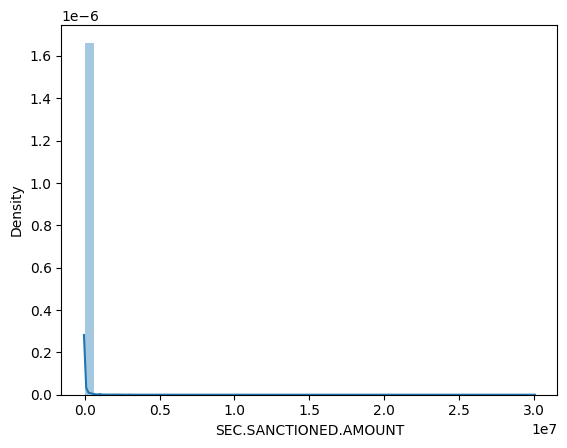

In [122]:
sns.distplot(df["SEC.SANCTIONED.AMOUNT"])

<Axes: xlabel='SEC.DISBURSED.AMOUNT', ylabel='Density'>

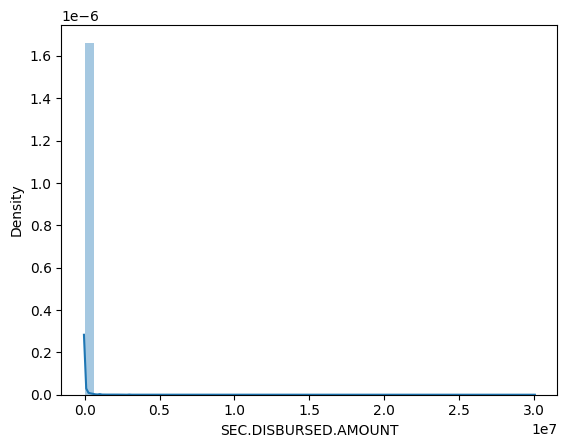

In [123]:
sns.distplot(df["SEC.DISBURSED.AMOUNT"])

<Axes: xlabel='SEC.CURRENT.BALANCE', ylabel='Density'>

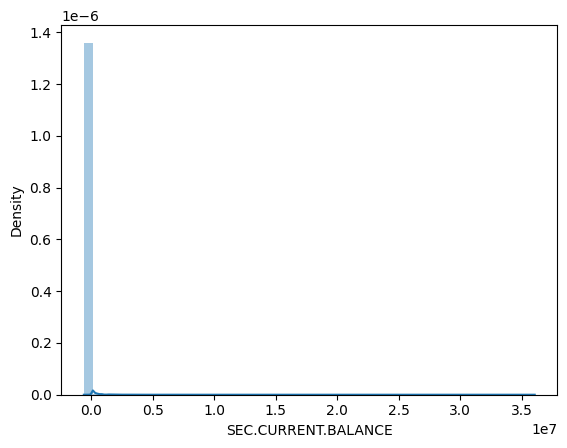

In [124]:
sns.distplot(df["SEC.CURRENT.BALANCE"])

In [125]:
ttest_ind(group_0["SEC.CURRENT.BALANCE"],group_1["SEC.CURRENT.BALANCE"])

TtestResult(statistic=2.6709443833814404, pvalue=0.0075643427363124875, df=233152.0)

In [126]:
ttest_ind(group_0["SEC.DISBURSED.AMOUNT"],group_1["SEC.DISBURSED.AMOUNT"])

TtestResult(statistic=3.0171010253670043, pvalue=0.0025523226185338705, df=233152.0)

In [127]:
ttest_ind(group_0["SEC.SANCTIONED.AMOUNT"],group_1["SEC.SANCTIONED.AMOUNT"])

TtestResult(statistic=3.068298386446011, pvalue=0.002153062273491789, df=233152.0)

**PRIMARY.INSTAL.AMT & SEC.INSTAL.AMT**

In [128]:
df["PRIMARY.INSTAL.AMT"].describe()

count    2.331540e+05
mean     1.310548e+04
std      1.513679e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.999000e+03
max      2.564281e+07
Name: PRIMARY.INSTAL.AMT, dtype: float64

In [129]:
df["SEC.INSTAL.AMT"].describe()

count    2.331540e+05
mean     3.232684e+02
std      1.555369e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.170901e+06
Name: SEC.INSTAL.AMT, dtype: float64

<Axes: xlabel='PRIMARY.INSTAL.AMT', ylabel='Density'>

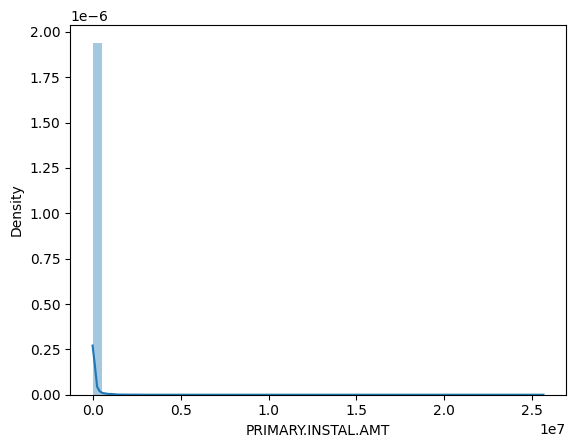

In [130]:
sns.distplot(df["PRIMARY.INSTAL.AMT"])

<Axes: xlabel='SEC.INSTAL.AMT', ylabel='Density'>

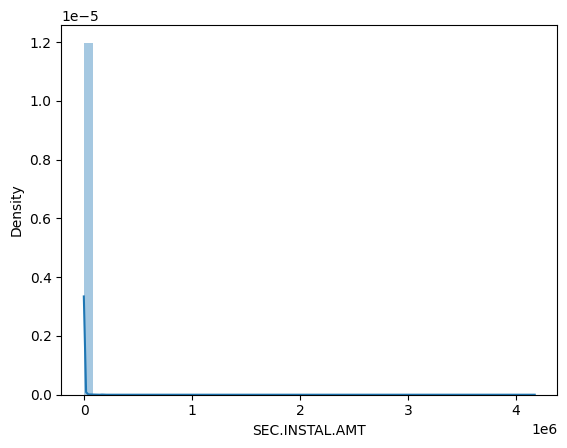

In [131]:
sns.distplot(df["SEC.INSTAL.AMT"])

In both cases,we see abnormal max values.

In [132]:
df[df["PRIMARY.INSTAL.AMT"]==df["PRIMARY.INSTAL.AMT"].max()][["PRI.DISBURSED.AMOUNT","PRIMARY.INSTAL.AMT"]]

,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT
125308,1200000,25642806


- H0: mean_emi_of_non_defaulters == mean_emi_of_non_defaulters
- H1: mean_emi_of_non_defaulters != mean_emi_of_non_defaulters

In [133]:
ttest_ind(group_0["PRIMARY.INSTAL.AMT"],group_1["PRIMARY.INSTAL.AMT"])

TtestResult(statistic=5.126237219178529, pvalue=2.9582549602329715e-07, df=233152.0)

pvalue less than .05 which rejects null hypothesis in favour of alternate hypothesis that emi of both groups differ.

In [134]:
ttest_ind(group_0["SEC.INSTAL.AMT"],group_1["SEC.INSTAL.AMT"])

TtestResult(statistic=0.7476974360618774, pvalue=0.4546434321302706, df=233152.0)

pvalue greater than .05 it fails to reject which stats that mean of two groups are same (insignificant features)

**NEW.ACCTS.IN.LAST.SIX.MONTHS**

In [135]:
df["NEW.ACCTS.IN.LAST.SIX.MONTHS"].value_counts().head()

NEW.ACCTS.IN.LAST.SIX.MONTHS
0    181494
1     32099
2     11015
3      4458
4      1957
Name: count, dtype: int64

In [136]:
conti_table=pd.crosstab(df['NEW.ACCTS.IN.LAST.SIX.MONTHS'],df["loan_default"],normalize="index")

- H0: There is no siginificant relationship between the NEW.ACCTS.IN.LAST.SIX.MONTHS and no_of_defaulters
- H1: There is  siginificant relationship between the NEW.ACCTS.IN.LAST.SIX.MONTHS and no_of_defaulters

In [137]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [138]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 6.8198968740511186 p_value- 0.9998828825427777


This parameter also fails to reject null hypothesis which conveys there is no significant relationship between   NEW.ACCTS.IN.LAST.SIX.MONTHS and no_of_defaulters

**DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS**

In [139]:
df["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"].value_counts().head()

DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
0    214959
1     14941
2      2470
3       537
4       138
Name: count, dtype: int64

In [140]:
conti_table=pd.crosstab(df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'],df["loan_default"],normalize="index")

In [141]:
df[df["First_Time_Account_Holder"]==1].head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age_at_time_of_disbursement,month_of_disbursement,Scored_Or_Not,First_Time_Account_Holder,Active_accounts_Flag,Overdue_accounts_Flag
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,2018-03-08,6,1998,1,1,0,0,0,0,0,No_Score,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,36,3,1,1,0,0
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,2018-01-08,6,1998,1,1,0,0,0,0,0,No_Score,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,35,1,1,1,0,0
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No_Score,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,43,9,1,1,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,2018-09-23,6,1998,1,1,0,0,0,0,0,No_Score,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,32,9,1,1,0,0
22,563215,43594,78256,57.50,67,22744,86,1499,14-07-94,Self employed,2018-08-10,6,1998,1,1,0,0,0,0,0,No_Score,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,26,8,1,1,0,0


- H0: There is no siginificant relationship between the DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS and no_of_defaulters
- H1: There is  siginificant relationship between the DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS and no_of_defaulters

In [142]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [143]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 2.28208875754001 p_value- 0.9995269170827656


This parameter also fails to reject null hypothesis which conveys there is no significant relationship between   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS and no_of_defaulters

**NO.OF_INQUIRIES**

In [144]:
df["NO.OF_INQUIRIES"].value_counts().head()

NO.OF_INQUIRIES
0    201961
1     22285
2      5409
3      1767
4       760
Name: count, dtype: int64

In [145]:
conti_table=pd.crosstab(df['NO.OF_INQUIRIES'],df["loan_default"],normalize="index")

- H0: There is no siginificant relationship between the NO.OF_INQUIRIES and no_of_defaulters
- H1: There is  siginificant relationship between the NO.OF_INQUIRIES and no_of_defaulters

In [146]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [147]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 4.777288778135122 p_value- 0.9999919312983875


This parameter also fails to reject null hypothesis which conveys there is no significant relationship between   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS and no_of_defaulters

**AVERAGE.ACCT.AGE**

In [148]:
df["AVERAGE.ACCT.AGE"].describe()

count        233154
unique          192
top       0yrs 0mon
freq         119373
Name: AVERAGE.ACCT.AGE, dtype: object

In [149]:
df["AVERAGE.ACCT.AGE"]=df["AVERAGE.ACCT.AGE"].apply(lambda x:(int((x.split("y"))[0])*12)+(int((x.split())[1].split("m")[0])))

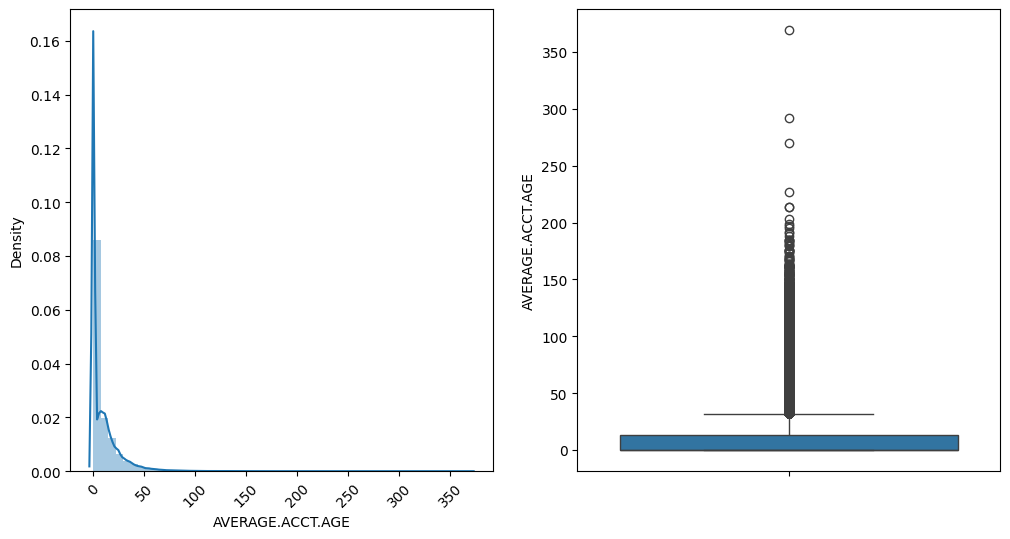

In [150]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.distplot(df["AVERAGE.ACCT.AGE"],ax=ax[0])
sns.boxplot(df["AVERAGE.ACCT.AGE"],ax=ax[1])
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)
plt.show()

<Axes: xlabel='loan_default', ylabel='AVERAGE.ACCT.AGE'>

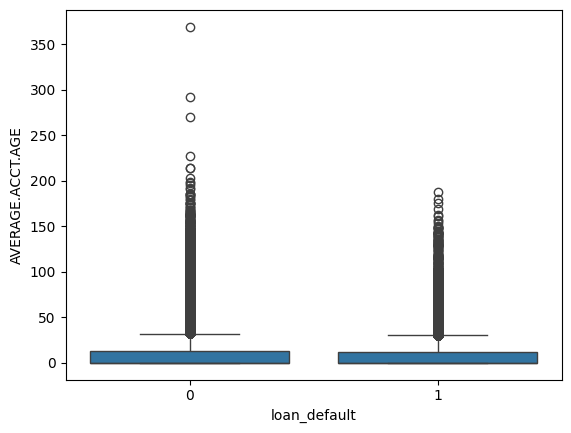

In [151]:
sns.boxplot(x=df["loan_default"],y=df["AVERAGE.ACCT.AGE"])

In [152]:
df["AVERAGE.ACCT.AGE"].describe()

count    233154.000000
mean          8.915764
std          15.106416
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max         369.000000
Name: AVERAGE.ACCT.AGE, dtype: float64

In [153]:
group_0=df[df["loan_default"]==0]
group_1=df[df["loan_default"]==1]

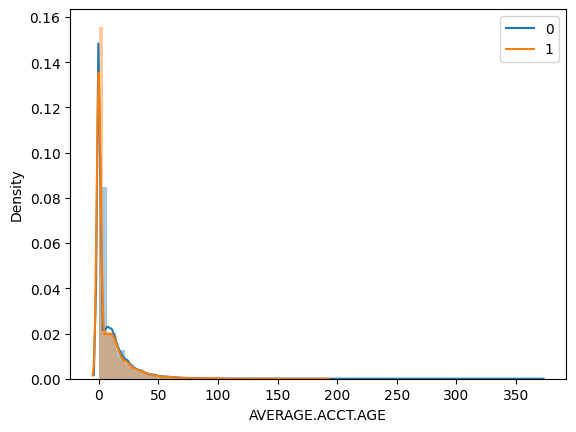

In [154]:
sns.distplot(group_0["AVERAGE.ACCT.AGE"])
sns.distplot(group_1["AVERAGE.ACCT.AGE"])
plt.legend([0,1])
plt.show()

- H0: mean_avg_age_of_non_defaulters == mean_avg_age_of_non_defaulters
- H1: mean_avg_age_of_non_defaulters != mean_avg_age_of_non_defaulters

In [155]:
ttest_ind(group_0["AVERAGE.ACCT.AGE"],group_1["AVERAGE.ACCT.AGE"])

TtestResult(statistic=11.969316978054646, pvalue=5.261091482095756e-33, df=233152.0)

pvalue less than .05 which rejects null hypothesis in favour of alternate hypothesis that emi of both groups differ.

In [156]:
df["CREDIT.HISTORY.LENGTH"]=df["CREDIT.HISTORY.LENGTH"].apply(lambda x:(int((x.split("y"))[0])*12)+(int((x.split())[1].split("m")[0])))

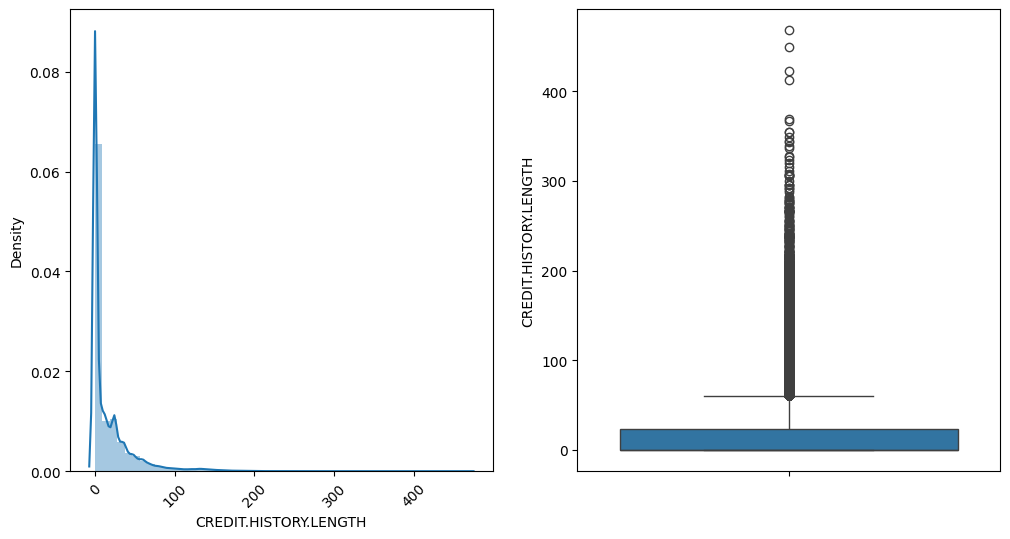

In [157]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.distplot(df["CREDIT.HISTORY.LENGTH"],ax=ax[0])
sns.boxplot(df["CREDIT.HISTORY.LENGTH"],ax=ax[1])
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)
plt.show()

<Axes: xlabel='loan_default', ylabel='CREDIT.HISTORY.LENGTH'>

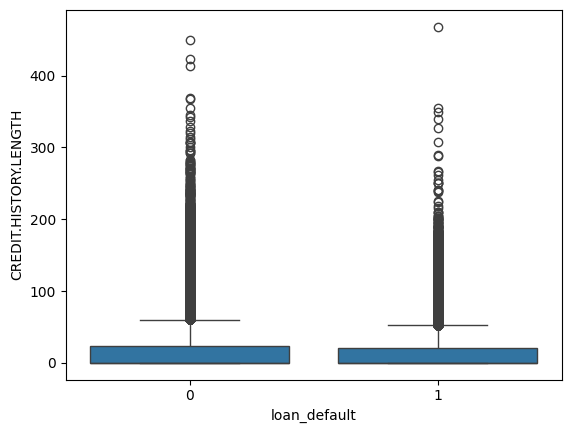

In [158]:
sns.boxplot(x=df["loan_default"],y=df["CREDIT.HISTORY.LENGTH"])

In [159]:
df["CREDIT.HISTORY.LENGTH"].describe()

count    233154.000000
mean         16.252404
std          28.581255
min           0.000000
25%           0.000000
50%           0.000000
75%          24.000000
max         468.000000
Name: CREDIT.HISTORY.LENGTH, dtype: float64

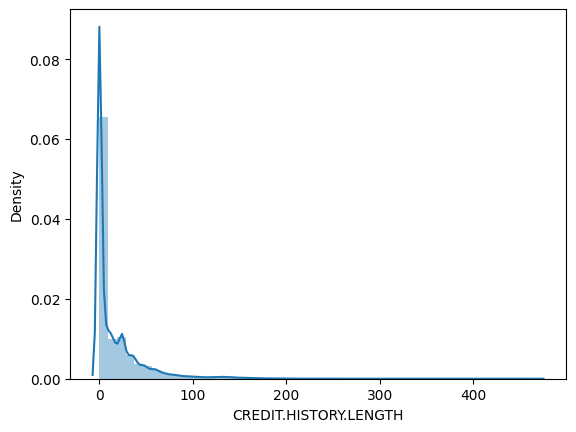

In [160]:
sns.distplot(df["CREDIT.HISTORY.LENGTH"])
plt.show()

In [161]:
df1=df[['disbursed_amount', 'asset_cost', 'ltv','Age_at_time_of_disbursement',"PERFORM_CNS.SCORE",
   'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT','AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']]

In [162]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
Age_at_time_of_disbursement,233154.0,36.100946,9.805992e+00,20.00,28.00,34.0,43.00,7.100000e+01
PERFORM_CNS.SCORE,233154.0,289.462994,3.383748e+02,0.00,0.00,0.0,678.00,8.900000e+02
PRI.CURRENT.BALANCE,233154.0,165900.076936,9.422736e+05,-6678296.00,0.00,0.0,35006.50,9.652492e+07
PRI.SANCTIONED.AMOUNT,233154.0,218503.855323,2.374794e+06,0.00,0.00,0.0,62500.00,1.000000e+09
PRI.DISBURSED.AMOUNT,233154.0,218065.898655,2.377744e+06,0.00,0.00,0.0,60800.00,1.000000e+09
SEC.CURRENT.BALANCE,233154.0,5427.792819,1.702370e+05,-574647.00,0.00,0.0,0.00,3.603285e+07
SEC.SANCTIONED.AMOUNT,233154.0,7295.923347,1.831560e+05,0.00,0.00,0.0,0.00,3.000000e+07


<Axes: xlabel='PRI.DISBURSED.AMOUNT', ylabel='PRI.SANCTIONED.AMOUNT'>

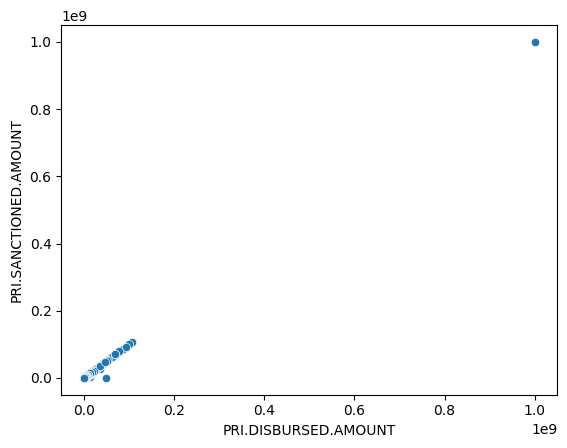

In [163]:
sns.scatterplot(x=df["PRI.DISBURSED.AMOUNT"], y=df["PRI.SANCTIONED.AMOUNT"])

<Axes: xlabel='SEC.DISBURSED.AMOUNT', ylabel='SEC.SANCTIONED.AMOUNT'>

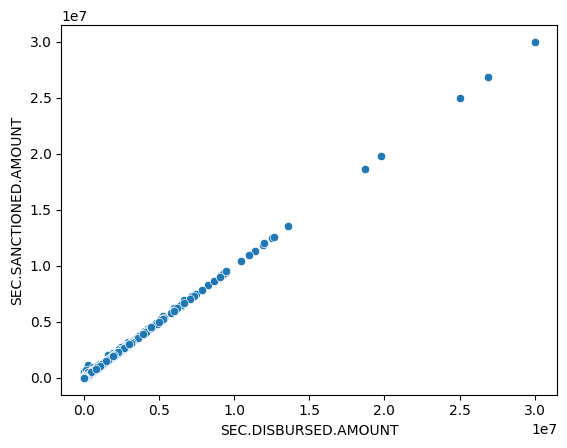

In [164]:
sns.scatterplot(x=df["SEC.DISBURSED.AMOUNT"], y=df["SEC.SANCTIONED.AMOUNT"])

In [165]:
num_cols=['disbursed_amount', 'asset_cost', 'ltv','Age_at_time_of_disbursement',"PERFORM_CNS.SCORE",
   'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT','AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']

In [166]:
cat_cols=set(df.columns)-set(num_cols)

In [167]:
cat_cols.remove("loan_default")
cat_cols.remove("DisbursalDate")
cat_cols.remove("Date.of.Birth")

In [168]:
cat_cols=list(cat_cols)

In [169]:
cat_cols

['Scored_Or_Not',
 'month_of_disbursement',
 'PAN_flag',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'SEC.ACTIVE.ACCTS',
 'Current_pincode_ID',
 'Driving_flag',
 'Aadhar_flag',
 'NO.OF_INQUIRIES',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'Active_accounts_Flag',
 'supplier_id',
 'UniqueID',
 'Passport_flag',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'Employment.Type',
 'First_Time_Account_Holder',
 'MobileNo_Avl_Flag',
 'SEC.OVERDUE.ACCTS',
 'State_ID',
 'PRI.NO.OF.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'SEC.NO.OF.ACCTS',
 'VoterID_flag',
 'Employee_code_ID',
 'branch_id',
 'PRI.ACTIVE.ACCTS',
 'manufacturer_id',
 'Overdue_accounts_Flag']

In [170]:
df1=df.copy()

In [171]:
lb_cols=df1.select_dtypes(include="object").columns

In [172]:
lb=LabelEncoder()
for i in lb_cols:
    df1[i]=lb.fit_transform(df1[i])

In [173]:
Chi_stat=[]
P_Val=[]
for i in cat_cols:
    table=pd.crosstab(df[i],df["loan_default"])
    Chi_stat.append(chi2_contingency(table)[0])
    P_Val.append(chi2_contingency(table)[1])

**Overall Statistical Data Analysis For Categorical Features**

In [174]:
Cat_cols_Stat=pd.DataFrame(data=[Chi_stat,P_Val],columns=cat_cols,
             index=["Chi_Stat","P_value"]).T.sort_values("P_value")

In [175]:
Cat_cols_Stat

,Chi_Stat,P_value
PERFORM_CNS.SCORE.DESCRIPTION,2114.465408,0.000000e+00
branch_id,2930.842784,0.000000e+00
Current_pincode_ID,12702.769933,0.000000e+00
Employee_code_ID,10531.308447,0.000000e+00
supplier_id,9339.709282,0.000000e+00
State_ID,1626.861781,0.000000e+00
Overdue_accounts_Flag,567.070856,2.434934e-125
PRI.OVERDUE.ACCTS,593.752865,3.291632e-112
month_of_disbursement,524.415251,1.982491e-105
VoterID_flag,445.908843,5.603683e-99


In [176]:
F_stat=[]
P_Val=[]
for i in num_cols:
    F_stat.append(f_oneway(df["loan_default"],df[i])[0])
    P_Val.append(f_oneway(df["loan_default"],df[i])[1])

In [177]:
Num_cols_Stat=pd.DataFrame(data=[F_stat,P_Val],columns=num_cols,
             index=["F_stat","P_value"]).T.sort_values("P_value")

In [178]:
Num_cols_Stat

,F_stat,P_value
disbursed_amount,4.094325e+06,0.000000e+00
asset_cost,3.738909e+06,0.000000e+00
ltv,9.854228e+06,0.000000e+00
Age_at_time_of_disbursement,3.116675e+06,0.000000e+00
PERFORM_CNS.SCORE,1.703651e+05,0.000000e+00
PRI.CURRENT.BALANCE,7.227380e+03,0.000000e+00
PRI.SANCTIONED.AMOUNT,1.973823e+03,0.000000e+00
PRI.DISBURSED.AMOUNT,1.961044e+03,0.000000e+00
PRIMARY.INSTAL.AMT,1.747700e+03,0.000000e+00
AVERAGE.ACCT.AGE,7.725110e+04,0.000000e+00


In [179]:
def cramers_corrected_stat(col):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix=pd.crosstab(df[col],df["loan_default"])
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [180]:
cramers_val=[cramers_corrected_stat(i) for i in cat_cols]

In [181]:
cramers_df=pd.DataFrame(data=cramers_val,index=cat_cols,columns=["Strength"]).sort_values("Strength",ascending=False)

In [182]:
cm = sns.light_palette("green", as_cmap=True)

In [185]:
cramers_df[:-2].style.background_gradient(cmap=cm)

,Strength
Employee_code_ID,0.176489
supplier_id,0.165520
Current_pincode_ID,0.160495
branch_id,0.110558
PERFORM_CNS.SCORE.DESCRIPTION,0.094938
State_ID,0.082991
PRI.OVERDUE.ACCTS,0.049564
Overdue_accounts_Flag,0.049274
month_of_disbursement,0.046926
NO.OF_INQUIRIES,0.046350


In [186]:
val=[abs(pointbiserialr(df[i],df["loan_default"])[0]) for i in num_cols]

In [187]:
Num_cols_strength=pd.DataFrame(data=val,index=num_cols,columns=["Strength"]).sort_values("Strength",ascending=False)

In [188]:
Num_cols_strength.style.background_gradient(cmap=cm)

,Strength
ltv,0.098208
disbursed_amount,0.077675
PERFORM_CNS.SCORE,0.057929
CREDIT.HISTORY.LENGTH,0.042126
Age_at_time_of_disbursement,0.037287
PRI.CURRENT.BALANCE,0.027386
AVERAGE.ACCT.AGE,0.024781
asset_cost,0.014261
PRI.SANCTIONED.AMOUNT,0.011304
PRI.DISBURSED.AMOUNT,0.011155


In [189]:
def cramers_corrected_stat(col1,col2):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix=pd.crosstab(df[col1],df[col2])
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [190]:
cat_cols.remove("MobileNo_Avl_Flag")

In [191]:
cat_cols.remove("UniqueID")

In [192]:
val=[]
for i in cat_cols:
    for j in cat_cols:
        val.append(cramers_corrected_stat(i,j))

In [193]:
len(val)**.5

27.0

In [194]:
cramers_df=pd.DataFrame(data=np.array(val).reshape(27,27),index=cat_cols,columns=cat_cols)

<Axes: >

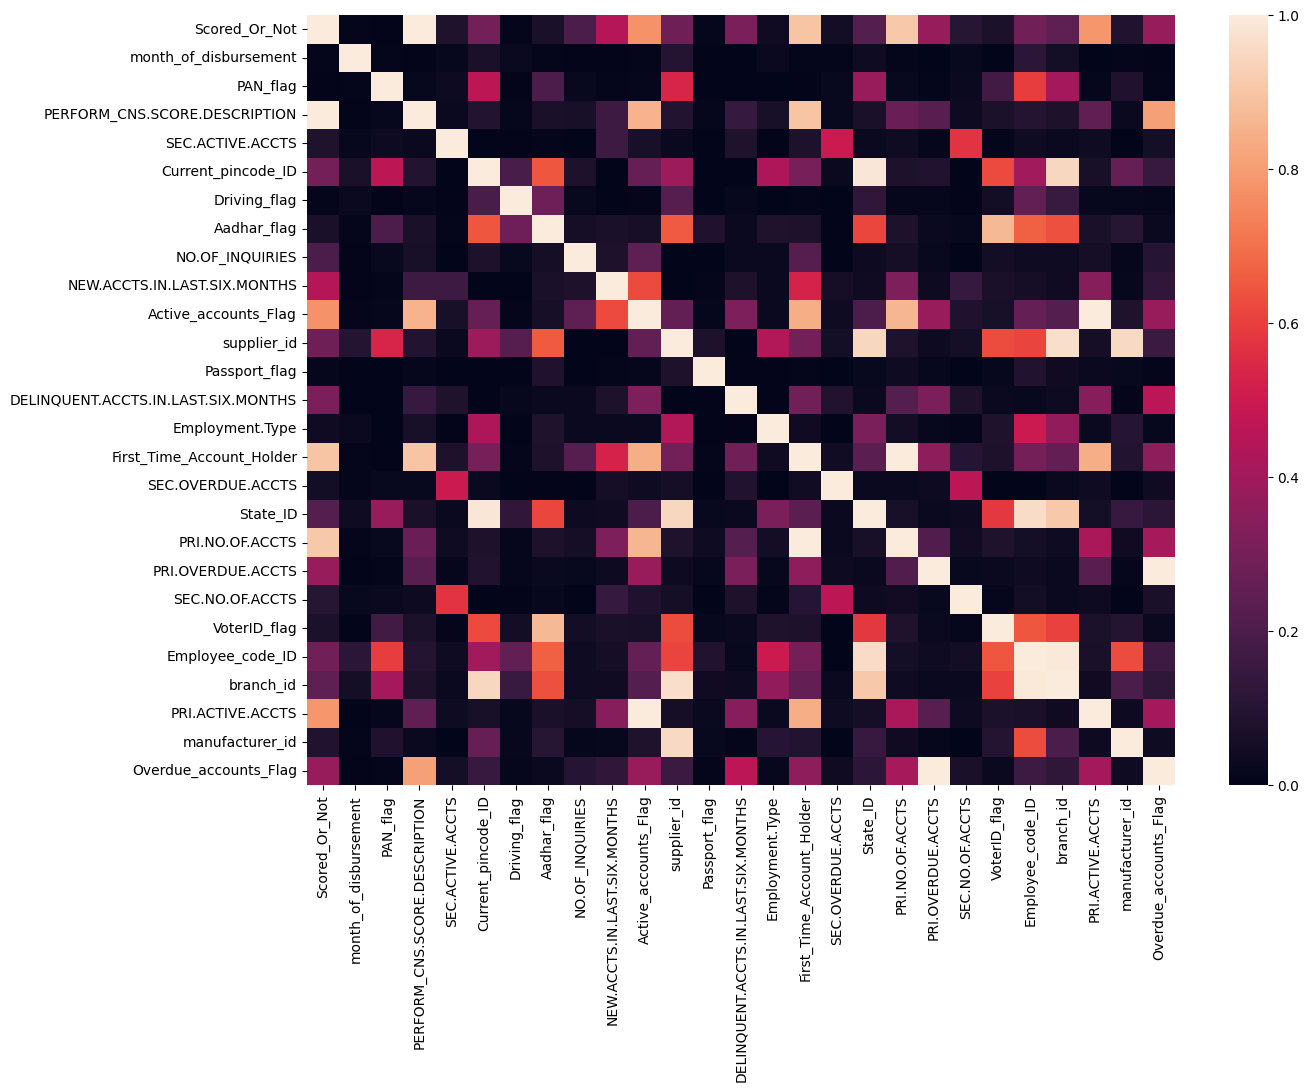

In [195]:
plt.figure(figsize=(14,10))
sns.heatmap(cramers_df)

<Axes: >

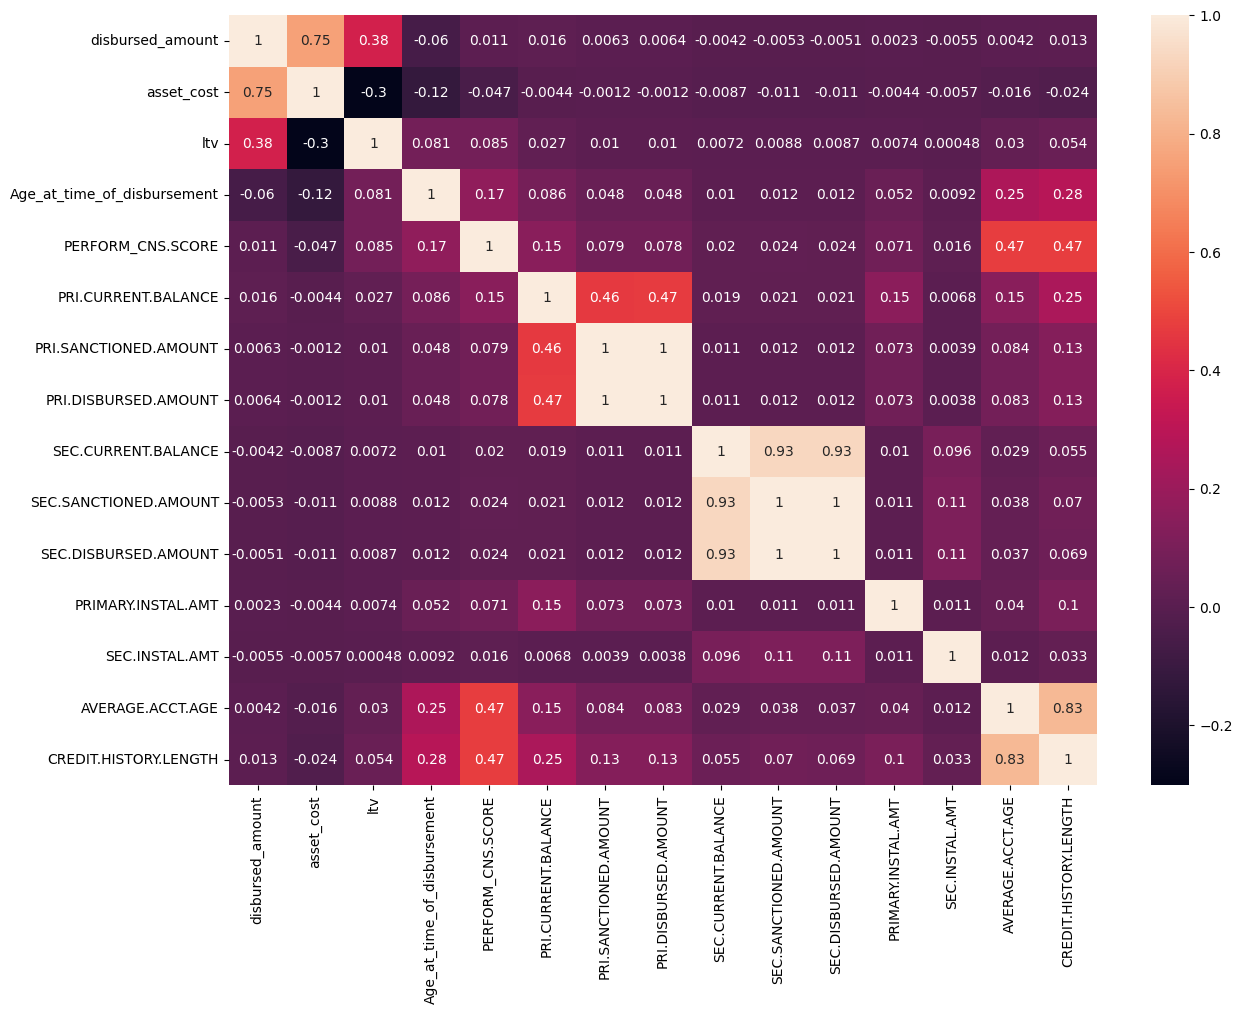

In [196]:
plt.figure(figsize=(14,10))
sns.heatmap(df[num_cols].corr(),annot=True)